## Imports

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../regex'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import re
import helper
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

# Dataframe Aposentadoria

In [3]:
files = helper.get_files_path("../data/dodfs_txt_barra_n/")
rets_final = helper.extract_multiple(files, "aposentadoria", True, "../results/")
rets_final

,Tipo do Ato,SEI,Nome,Matrícula,Tipo de Aposentadoria,Cargo,Classe,Padrao,Quadro,Fundamento Legal,Orgao,Vigencia,Matricula SIAPE
0,Aposentadoria,00040-\n00017194/2019-51,FRANCISCO DAS\nCHAGAS MENDES DA SILVA,135.125-7,nan,Tecnico em Saude - AUXILIAR DE ENFERMAGEM,Especial,I,Quadro\nde Pessoal da Secretaria de Estado de ...,"40, 1o, inciso I, in fine, da Constituicao da...",Secretaria de Estado de Saude do Distrito Fed...,nan,nan
1,Aposentadoria,00040-00015621/2019-67,SUSILENE DE JESUS\nPASSOS,139.873-3,nan,Tecnico em\nSaude - AUXILIAR DE ENFERMAGEM,nan,V,Quadro de Pessoal da Secretaria\nde Estado de ...,"40, 1o, inciso I, in fine, da Constituicao da...",Secretaria\nde Estado de Saude do Distrito Fe...,nan,nan
2,Aposentadoria,00040-00013915/2019-54,JOAO VIEIRA GONCALVES,135.876-6,nan,Tecnico em Saude - AUXILIAR DE ENFERMAGEM,Especial,III,Quadro de Pessoal da Secretaria de Estado de S...,nan,Secretaria de Estado de Saude do Distrito Fed...,nan,nan
3,Aposentadoria,00040-00013918/2019-98,MARIA DO CARMO DE AZEVEDO,147.126-0,nan,Tecnico em Saude - AUXILIAR DE ENFERMAGEM,nan,II,Quadro de Pessoal da Secretaria de Estado de S...,nan,Secretaria de Estado de Saude do Distrito Fed...,nan,nan
4,Aposentadoria,00040-00013678/2019-21,NILSILENE MENDES GOMES DA SILVA,137.540-7,nan,Tecnico em Saude - AUXILIAR DE ENFERMAGEM,Especial,III,Quadro de Pessoal da Secretaria de Estado de S...,nan,Secretaria de Estado de Saude do Distrito Fed...,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,Aposentadoria,00080-00165431/2019-41,nan,40.632-5,nan,Agente de Gestao Educacional/Conservacao e Li...,nan,1,Quadro de Pessoal do Distrito Federal,nan,Distrito Federal,nan,nan
4700,Aposentadoria,00080-00182117/2019-22,nan,41.144-2,nan,Agente de Gestao Educacional/Copa e Cozinha,nan,1,Quadro de Pessoal do Distrito Federal,3o,Distrito Federal,nan,nan
4701,Aposentadoria,00080.00059064/2019-47,UDINEIA APARECIDA ALVES,209.832-,nan,Agente de Gestao Educacional/Copa e Cozinha,nan,3,Quadro de Pessoal do Distrito Federal,40,Distrito Federal,nan,nan
4702,Aposentadoria,00080-00220065/2019-08,VAINE DEL BIANCO NASCIMENTO,300.974-2,nan,Professor de Educacao Basica,nan,23,Quadro de \nPessoal do Distrito Federal,"6o da Emenda Constitucional no 41, de 31 \nde...",nan,nan,nan


# Análise

In [4]:
def attribute_stats(name, rets_final):
    presence_name = rets_final[name].value_counts()
    total = rets_final.count()
    labels = ["Com " + name, "Sem " + name]
    size = [total[name] - presence_name[0], presence_name[0]]
    return size, labels

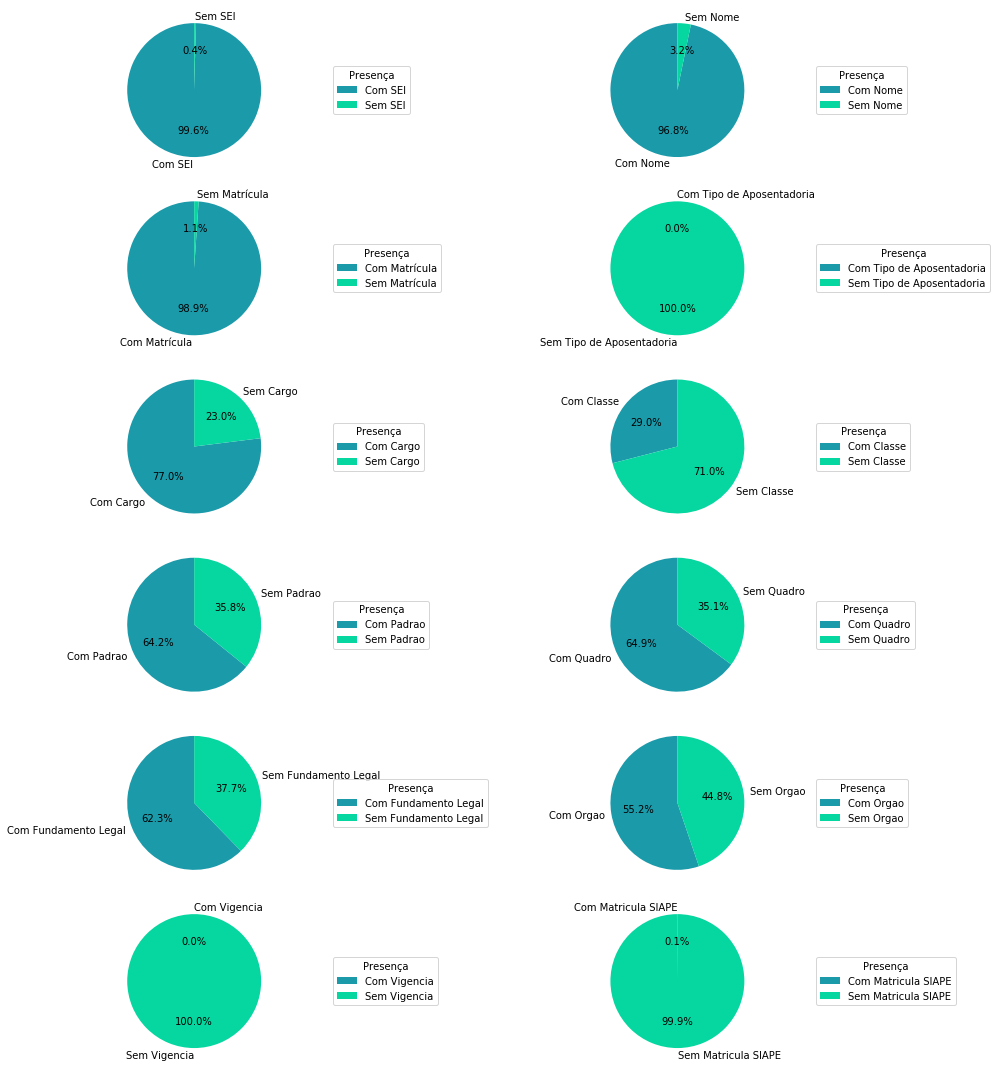

In [5]:
cor = ['#1b9aaa', '#06d6a0']
numb_attr = rets_final.shape[1]-1
grid_square = math.ceil(numb_attr/2)

grid_square = int(grid_square)
_, ax = plt.subplots(grid_square, 2, figsize=(15,15))
names = rets_final.columns[1:]
for i in range(grid_square*2):
    if i < numb_attr:
        size, labels = attribute_stats(names[i], rets_final)
        ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
        ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
    else:
        ax[math.floor(i/2), i%2].axis('off')

plt.tight_layout()
plt.show()